In [2]:
from PDEFind_class import PDE_Findclass

import time, glob

import numpy as np
import matplotlib.pyplot as plt
import os
import pdb

from model_selection_IP3 import ODE_sim,learned_RHS_ODE_SIR
from PDE_FIND3 import print_pde

In [3]:
# growth, death terms
ri = 0.005
rr = round(ri/4.0,3)

dataset = ["SIR_ABM_ri_"+str(ri)+"_rr_"+str(rr)+"_real25"]

In [4]:
#Learning specs

#PDE-FIND values
data_dir = "../data/"
comp_str = ""

model_name = ""

trainPerc = 0.5
valPerc = 0.5

deg = 4
shuf_method = 'perm'#'neighbors_'+str(dim)+'d'
algo_name = 'Lasso'
prune_level = 0.10
num_eqns = 3
save_learned_eqns = True
bb = True
#save all xi values during training
save_xi = True
#save the final value of xi after training
save_learned_xi = True

reals = 10#500

In [ ]:
true_derivs = [[]]
true_param = [[]]

pf = PDE_Findclass(dataset,
                       comp_str,
                       model_name,
                       data_dir=data_dir,
                       reals=reals,
                       trainPerc = trainPerc,
                       valPerc = valPerc,
                       deg=deg,
                       save_xi = save_xi,
                       save_learned_xi = save_learned_xi,
                       prune_level = prune_level,
                       num_eqns=num_eqns,
                       save_learned_eqns = save_learned_eqns,
                       true_param = true_param,
                       true_derivs = true_derivs,
                       shuf_method = shuf_method,
                       bb = bb,
                       algo_name = algo_name)

In [ ]:
pf.train_val_ODEFind_SIR()
pf.list_common_eqns_SIR()

In [ ]:
plt.figure()
print(print_pde(pf.inferred_xi[0][0][:,np.newaxis],pf.description))
plt.plot(pf.St,np.matmul(pf.Theta,pf.inferred_xi[0][0]),'b.')
plt.plot(pf.St,np.matmul(pf.Theta,np.array([[0,0,0,0,-ri]]).T),'r.')
plt.plot(pf.St,pf.St,'k--')

In [ ]:
plt.figure()
print(print_pde(pf.inferred_xi[1][0][:,np.newaxis],pf.description))
plt.plot(pf.It,np.matmul(pf.Theta,pf.inferred_xi[1][0]),'b.')
plt.plot(pf.It,np.matmul(pf.Theta,np.array([[0,0,-rr,0,ri]]).T),'r.')
plt.plot(pf.It,pf.It,'k-')

In [ ]:
inferred_xis =  [pf.inferred_xi[0][0],pf.inferred_xi[1][0]]
MF_xis = [np.array([[0,0,0,0,-ri]]).T,np.array([[0,0,-rr,0,ri]]).T]
y0 = np.array((pf.S[0][0],pf.I[0][0]))

y_inferred = ODE_sim(inferred_xis,learned_RHS_ODE_SIR,pf.t,y0,description=pf.description)
y_MF = ODE_sim(MF_xis,learned_RHS_ODE_SIR,pf.t,y0,description=pf.description)

In [1]:
true_derivs = [[]]
true_param = [[]]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pf.t*rr,y_MF[0,:],"b",label = "S MF Model")
ax.plot(pf.t*rr,y_MF[1,:],"g",label = "I MF Model")
ax.plot(pf.t*rr,1 - y_MF[0,:] - y_MF[1,:],"k",label = "R MF Model")

ax.plot(pf.t*rr,y_inferred[0,:],"b--",label = "S Learned Model")
ax.plot(pf.t*rr,y_inferred[1,:],"g--",label = "I Learned Model")
ax.plot(pf.t*rr,1 - y_inferred[0,:] - y_inferred[1,:],"k--",label = "R Learned Model")

ax.plot(pf.t[::4]*rr,pf.S[::4],"b.",label = "S ABM Model",markersize=8)
ax.plot(pf.t[::4]*rr,pf.I[::4],"g.",label = "I ABM Model",markersize=8)
ax.plot(pf.t[::4]*rr,1 - pf.S[::4] - pf.I[::4],"k.",label = "R ABM Model",markersize=8)

plt.legend()

NameError: name 'plt' is not defined

## Now do the same for several rp values

Running 10 SinDy Simulations to determine learned equation
library is ['S', 'S^2', 'I', 'I^2', 'IS']


/Users/aarabimadhavan/Dropbox/John/summer20/research/ABM_EQL/EQL/PDE_FIND3.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if biginds != []: w[biginds] = np.linalg.lstsq(X[:, biginds],Y)[0]


Top Learned equations are:
S_t =  - 0.0046IS   
I_t =  - 0.00127I    + 0.00469IS   
Running 10 SinDy Simulations to determine learned equation
library is ['S', 'S^2', 'I', 'I^2', 'IS']
Top Learned equations are:
S_t =  - 0.00898IS   
I_t =  - 0.00099I    + 0.00898IS   
Running 10 SinDy Simulations to determine learned equation
library is ['S', 'S^2', 'I', 'I^2', 'IS']
Top Learned equations are:
S_t = 0.00218I^2    - 0.07655IS   
I_t =  - 0.00916I    - 0.00521I^2    + 0.07674IS   
Running 10 SinDy Simulations to determine learned equation
library is ['S', 'S^2', 'I', 'I^2', 'IS']
Top Learned equations are:
S_t =  - 0.023S^2    - 0.00614I^2    - 0.12636IS   
I_t = 0.02121S^2    - 0.02395I    + 0.13162IS   


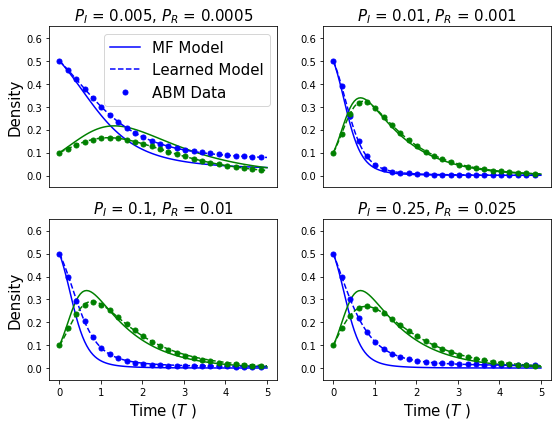

In [15]:
# growth, death terms

ri_vec = [0.005,0.01,0.1,0.25]
fontsize=15
fig = plt.figure(figsize=(9,6.5))
count = 1

xi_learned = []

for ri in ri_vec:
    
    rr = round(ri/10.0,3)

    dataset = ["SIR_ABM_ri_"+str(ri)+"_rr_"+str(rr)+"_real25"]

    pf = PDE_Findclass(dataset,
                           comp_str,
                           model_name,
                           data_dir=data_dir,
                           reals=reals,
                           trainPerc = trainPerc,
                           valPerc = valPerc,
                           deg=deg,
                           save_xi = save_xi,
                           save_learned_xi = save_learned_xi,
                           prune_level = prune_level,
                           num_eqns=num_eqns,
                           save_learned_eqns = save_learned_eqns,
                           true_param = true_param,
                           true_derivs = true_derivs,
                           shuf_method = shuf_method,
                           bb = bb,
                           algo_name = algo_name)
    
    pf.train_val_ODEFind_SIR()
    pf.list_common_eqns_SIR()
    
    
    inferred_xis =  [pf.inferred_xi[0][0],pf.inferred_xi[1][0]]
    MF_xis = [np.array([[0,0,0,0,-ri]]).T,np.array([[0,0,-rr,0,ri]]).T]
    y0 = np.array((pf.S[0][0],pf.I[0][0]))

    y_inferred = ODE_sim(inferred_xis,learned_RHS_ODE_SIR,pf.t,y0,description=pf.description)
    y_MF = ODE_sim(MF_xis,learned_RHS_ODE_SIR,pf.t,y0,description=pf.description)

    xi_learned.append(inferred_xis)
    
    ax = fig.add_subplot(2,2,count)
    
    if ri == 0.005:
        rr = round(ri/10.0,4)
    else:
        rr = round(ri/10.0,3)
    
    ax.set_title("$P_I$ = " +str(ri)+", $P_R$ = " +str(rr),fontsize=fontsize)
    
    if count > 2:
        ax.set_xlabel("Time ($T$ )",fontsize=fontsize)
    else:
        ax.set_xticks([])
    if count % 2 == 1:
        ax.set_ylabel("Density",fontsize=fontsize)

        
    ax.plot(pf.t*rr,y_MF[0,:],"b",label="MF Model")
    ax.plot(pf.t*rr,y_MF[1,:],"g")#,label="I")
    #ax.plot(pf.t*rr,0.6 - y_MF[0,:] - y_MF[1,:],"k",label = "R")

    ax.plot(pf.t*rr,y_inferred[0,:],"b--",label="Learned Model")
    ax.plot(pf.t*rr,y_inferred[1,:],"g--")
    #ax.plot(pf.t*rr,0.6 - y_inferred[0,:] - y_inferred[1,:],"k--")

    ax.plot(pf.t[::4]*rr,pf.S[::4],"b.",markersize=10,label="ABM Data")
    ax.plot(pf.t[::4]*rr,pf.I[::4],"g.",markersize=10)
    #ax.plot(pf.t[::4]*rr,0.6 - pf.S[::4] - pf.I[::4],"k.",markersize=10)

    ax.set_ylim(-0.05,0.65)

    if count == 1:
        plt.legend(fontsize=fontsize)
    count+=1
    
plt.savefig("case_study_1_SIR_comparison.pdf",format="pdf")

In [17]:
xi_learned[0]

[array([ 0.        ,  0.        ,  0.        ,  0.        , -0.00460073]),
 array([ 0.        ,  0.        , -0.00126549,  0.        ,  0.00469151])]

In [26]:
print('\\begin{tabular}{|c|c|c|c|}')
print('    \\hline')
print('    $P_I$ & \\ $P_R$ & \\ Mean-field Model & Learned Model \\\\ ')
print('    \\hline')

for i,ri in enumerate(ri_vec):
    rr = ri/10.0

    learned_S = print_pde(xi_learned[i][0][:,np.newaxis],pf.description,ut="\\nicefrac{\\text{d}S}{\\text{d}t}")
    learned_I = print_pde(xi_learned[i][1][:,np.newaxis],pf.description,ut="\\nicefrac{\\text{d}I}{\\text{d}t}")
    MF_S = print_pde(np.array([-ri])[:,np.newaxis],["$IS$"],ut="\\nicefrac{\\text{d}S}{\\text{d}t}")
    MF_I = print_pde(np.array([ri,-rr])[:,np.newaxis],["$IS$","$I$"],ut="\\nicefrac{\\text{d}I}{\\text{d}t}")

    print("    \multirow{2}{*}{$" + str(ri) + "$} & \multirow{2}{*}{$" + str(ri) + "$} & " + MF_S + "$ & $" + learned_S +"$ \\\\")
    print("     & & " + MF_I + "$ & $" + learned_I +"$ \\\\")
    print("    \\hline")
print('\\end{tabular}')



\begin{tabular}{|c|c|c|c|}
    \hline
    $P_I$ & \ $P_R$ & \ Mean-field Model & Learned Model \\ 
    \hline
    \multirow{2}{*}{$0.005$} & \multirow{2}{*}{$0.005$} & \nicefrac{\text{d}S}{\text{d}t} =  - 0.005$IS$   $ & $\nicefrac{\text{d}S}{\text{d}t} =  - 0.0046IS   $ \\
     & & \nicefrac{\text{d}I}{\text{d}t} = 0.005$IS$    - 0.0005$I$   $ & $\nicefrac{\text{d}I}{\text{d}t} =  - 0.00127I    + 0.00469IS   $ \\
    \hline
    \multirow{2}{*}{$0.01$} & \multirow{2}{*}{$0.01$} & \nicefrac{\text{d}S}{\text{d}t} =  - 0.01$IS$   $ & $\nicefrac{\text{d}S}{\text{d}t} =  - 0.00898IS   $ \\
     & & \nicefrac{\text{d}I}{\text{d}t} = 0.01$IS$    - 0.001$I$   $ & $\nicefrac{\text{d}I}{\text{d}t} =  - 0.00099I    + 0.00898IS   $ \\
    \hline
    \multirow{2}{*}{$0.1$} & \multirow{2}{*}{$0.1$} & \nicefrac{\text{d}S}{\text{d}t} =  - 0.1$IS$   $ & $\nicefrac{\text{d}S}{\text{d}t} = 0.00218I^2    - 0.07655IS   $ \\
     & & \nicefrac{\text{d}I}{\text{d}t} = 0.1$IS$    - 0.01$I$   $ & $\nicefrac{\t